In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('transaction_data.csv')
df.head(8)

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
0,10/30/2019 13:37,10/30/2019,142008725,102161515,1005,100054430,70000,20000
1,10/30/2019 20:26,10/30/2019,142119377,102867263,10050,1792841,80000,20000
2,10/30/2019 12:22,10/30/2019,141986418,100401383,10075,100155720,125000,20000
3,10/30/2019 9:46,10/30/2019,141941958,103213155,10088,103894677,82000,20000
4,10/30/2019 21:56,10/30/2019,142139275,101003290,10142,103909421,260000,20000
5,10/30/2019 10:31,10/30/2019,141951971,100614916,10163,103915242,1,0
6,10/30/2019 12:46,10/30/2019,141993339,100060089,10173,103915476,56000,16800
7,10/30/2019 16:44,10/30/2019,142070022,101245353,10194,102682654,300000,20000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   txn_time        4611 non-null   object
 1   txn_date        4611 non-null   object
 2   order_id        4611 non-null   int64 
 3   uid             4611 non-null   int64 
 4   shop_id         4611 non-null   int64 
 5   shop_owner_uid  4611 non-null   int64 
 6   gmv             4611 non-null   int64 
 7   rebate          4611 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 288.3+ KB


In [19]:
df_count = df.groupby('uid').count()
df_count.sort_values(by = ['order_id'], ascending=False)

,txn_time,txn_date,order_id,shop_id,shop_owner_uid,gmv,rebate
uid,,,,,,,
100205391,26,26,26,26,26,26,26
100605978,23,23,23,23,23,23,23
1026737,16,16,16,16,16,16,16
103023839,10,10,10,10,10,10,10
103868446,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...
100764004,1,1,1,1,1,1,1
100765289,1,1,1,1,1,1,1
100766925,1,1,1,1,1,1,1


Top 3 user co kha nag lam dung c.trinh nay la: '100205391', '100605978', '1026737' dua tren luot mua cua ho

In [36]:
df_shop_count = df.groupby('shop_owner_uid').count()
df_shop_count.sort_values(by = ['order_id'], ascending=False)

,txn_time,txn_date,order_id,uid,shop_id,gmv,rebate,gmv-binned
shop_owner_uid,,,,,,,,
102817559,256,256,256,256,256,256,256,256
103280547,50,50,50,50,50,50,50,50
1005510,32,32,32,32,32,32,32,32
103333474,31,31,31,31,31,31,31,31
103481792,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...
103201893,1,1,1,1,1,1,1,1
103202943,1,1,1,1,1,1,1,1
100205506,1,1,1,1,1,1,1,1


Top 3 shop co kha nag lam dung c.trinh nay la: '102817559', '103280547', '1005510' dua tren luot mua cua ho

In [26]:
bins = np.linspace(min(df['gmv']), max(df['gmv']), 10)
bins

array([1.00000000e+00, 4.16667556e+05, 8.33334111e+05, 1.25000067e+06,
       1.66666722e+06, 2.08333378e+06, 2.50000033e+06, 2.91666689e+06,
       3.33333344e+06, 3.75000000e+06])

In [29]:
group_gmv = ['4e+05', '8e+05', '1e+06', '1.6e+06',
            '2.e+06', '2.5e+06', '2.9e+06', '3e+06', '3.7e+0']

In [30]:
df['gmv-binned'] = pd.cut(df['gmv'], bins, labels=group_gmv, include_lowest=True )
df[['gmv','gmv-binned']].head(10)

,gmv,gmv-binned
0,70000,4e+05
1,80000,4e+05
2,125000,4e+05
3,82000,4e+05
4,260000,4e+05
5,1,4e+05
6,56000,4e+05
7,300000,4e+05
8,343000,4e+05
9,240000,4e+05


In [31]:
df['gmv-binned'].value_counts()

4e+05      4353
8e+05       196
1e+06        46
2.e+06        6
1.6e+06       4
2.9e+06       3
3.7e+0        2
2.5e+06       1
3e+06         0
Name: gmv-binned, dtype: int64

Text(0.5, 1.0, 'gmv-bin')

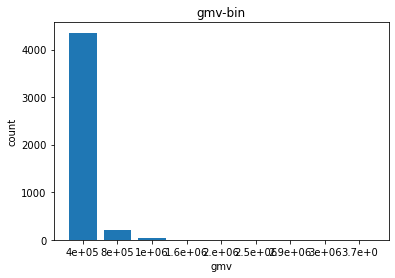

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_gmv, df['gmv-binned'].value_counts())

plt.pyplot.xlabel('gmv')
plt.pyplot.ylabel('count')
plt.pyplot.title('gmv-bin')

ideal fraud detection: 
- 1 kh mua qua nhieu sp trong thoi gian ngan - mua tren x lan + khoang cach giua cac lan mua hang theo min, max, mean
- 1 shop co luong don hang tang dot bien trong 1 khoang thoi gian

In [35]:
df.sort_values(by = ['uid'])

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate,gmv-binned
233,10/30/2019 20:54,10/30/2019,142126166,1002600,28170,1009049,79000,20000,4e+05
1618,10/31/2019 12:10,10/31/2019,142233428,1008042,605,102947073,35000,10500,4e+05
1616,10/31/2019 12:09,10/31/2019,142233074,1021839,605,102947073,50000,15000,4e+05
1389,10/31/2019 17:43,10/31/2019,142329835,1026737,30087,104071861,1,0,4e+05
1388,10/31/2019 17:34,10/31/2019,142328337,1026737,30087,104071861,1,0,4e+05
...,...,...,...,...,...,...,...,...,...
3486,11/2/2019 19:53,11/2/2019,142835171,104101238,28170,1009049,144000,20000,4e+05
4203,11/2/2019 18:25,11/2/2019,142817253,104101304,7783,100262106,157000,20000,4e+05
3585,11/2/2019 19:50,11/2/2019,142834636,104102194,29250,1011063,80000,20000,4e+05
4609,11/2/2019 20:48,11/2/2019,142847286,104102998,9967,1892155,1030000,20000,1e+06
